In [55]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

from astropy.stats import LombScargle

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

https://en.wikipedia.org/wiki/Integer_sequence

https://en.wikipedia.org/wiki/Fibonacci_number

In [31]:
def fib(n):
    '''
    return n digits of the Fibonacci sequence
    very inefficiently
    '''
    out = np.zeros(n)
    out[1] = 1
    for k in range(2,n):
        out[k] = out[k-2] + out[k-1]
    return out
    
    
def fib_approx(n):
    '''
    https://stackoverflow.com/a/4936086
    but w/ numpy arrays
    '''
    return np.array(((1 + np.sqrt(5)) / 2) ** np.arange(n) / np.sqrt(5) + 0.5, dtype=np.int)

In [32]:
fib(15)

array([  0.,   1.,   1.,   2.,   3.,   5.,   8.,  13.,  21.,  34.,  55.,
        89., 144., 233., 377.])

In [33]:
fib_approx(15)

array([  0,   1,   1,   2,   3,   5,   8,  13,  21,  34,  55,  89, 144,
       233, 377])

In [34]:
def _gaus(x, a, b, x0, sigma):
    """
    Simple Gaussian function

    Parameters
    ----------
    x : float or 1-d numpy array
        The data to evaluate the Gaussian over
    a : float
        the amplitude
    b : float
        the constant offset
    x0 : float
        the center of the Gaussian
    sigma : float
        the width of the Gaussian

    Returns
    -------
    Array or float of same type as input (x).
    """
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2)) + b

Text(0,0.5,'Flux')

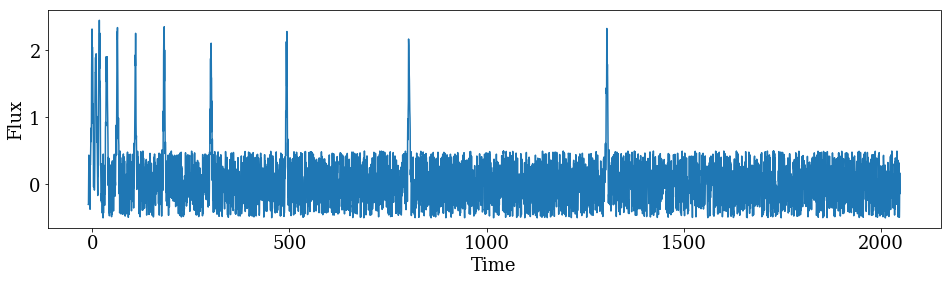

In [124]:
# let's make a Fib-spaced light curve pulse sequence

time = np.arange(-10, 2048, 0.5)
flux = np.random.random(len(time))*1 - 0.5


ptime = 1.8
Nfib = 12
fspace = 9.123
amp = 2.

fib_seq = fib(Nfib) * fspace

for k in range(len(fib_seq)):
    flux = flux + _gaus(time, amp, 0., np.cumsum(fib_seq)[k], ptime)


plt.figure(figsize=(16,4))
plt.plot(time, flux)
plt.xlabel('Time')
plt.ylabel('Flux')

(-10, 150)

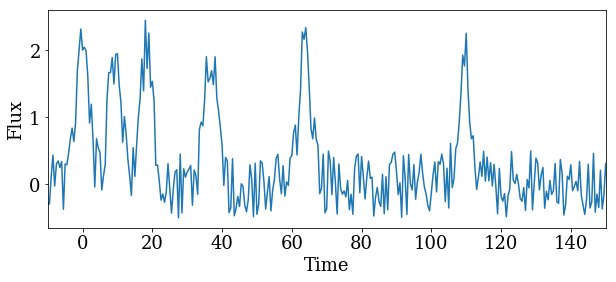

In [139]:
plt.figure(figsize=(10,4))
plt.plot(time, flux)
plt.xlabel('Time')
plt.ylabel('Flux')
plt.xlim(-10,150)
# plt.arrow(4,2,3,0)

In [126]:
GR = 1.61803398875 # the GOLDEN RATIO (of course...)

Text(0,0.5,'Power')

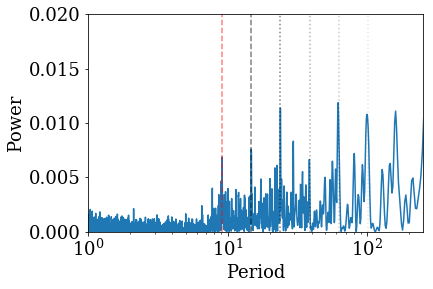

In [133]:
frequency, power = LombScargle(time, flux).autopower()

plt.plot(1. / frequency, power)

plt.xscale('log')
plt.ylim(0,.02)

plt.plot([fspace, fspace],[0,1], c='r', linestyle='--', alpha=0.5)

# plt.plot([fspace*2, fspace*2],[0,1], c='r', linestyle=':', alpha=0.5)
plt.plot([fspace*GR, fspace*GR],[0,1], c='k', linestyle='--', alpha=0.5)

plt.plot([fspace * GR**2, fspace * GR**2],[0,1], c='k', linestyle=':', alpha=0.5)
plt.plot([fspace * GR**3, fspace * GR**3],[0,1], c='k', linestyle=':', alpha=0.3)
plt.plot([fspace * GR**4, fspace * GR**4],[0,1], c='k', linestyle=':', alpha=0.2)
plt.plot([fspace * GR**5, fspace * GR**5],[0,1], c='k', linestyle=':', alpha=0.1)



plt.xlim(1, 250)
plt.xlabel('Period')
plt.ylabel('Power')